In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
Station = Base.classes.station
Measurement = Base.classes.measurement 

C:\Users\Haley\AppData\Local\Temp\ipykernel_38860\912750488.py:3: RemovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [7]:
# Save references to each table
#step completed in cell 5

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
print(most_recent_date)

2017-08-23


Text(0, 0.5, 'Inches')


<Figure size 1000x500 with 0 Axes>

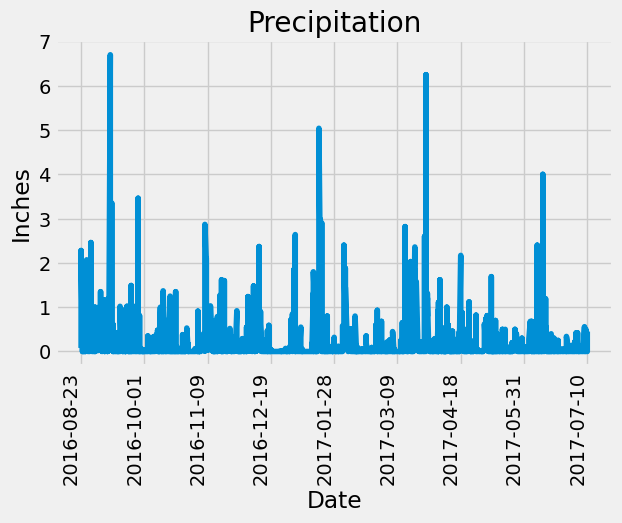

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
prev_year = dt.datetime.strptime(most_recent_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_data, columns=["date","precipitation"])

####convert date column to datetime format 
precip_df["date"] = pd.to_datetime(precip_df["date"])

#####Drop NaN values
precip_df = precip_df.dropna()

####Set the date column as index 
precip_df.set_index("date", inplace=True)

# Sort the dataframe by date
# precip_df = precip_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,5))
precip_df.plot(legend=False)
plt.xlabel("Date")
plt.ylabel("Inches")
ylabel_text = plt.ylabel("Inches")
print(ylabel_text)
plt.title("Precipitation")
plt.xticks(ticks=pd.date_range(start=precip_df.index.min(), end=precip_df.index.max(), periods=9), labels=["2016-08-23", "2016-10-01", "2016-11-09", "2016-12-19", "2017-01-28", "2017-03-09", "2017-04-18", "2017-05-31", "2017-07-10"], rotation=90)
plt.show()

#Original plt code that was crazy 
# plt.bar(precip_df["date"], precip_df["precipitation"], width=2, color='b', alpha=0.5)
# plt.xticks(rotation=45)
# plt.xlabel("Date")
# plt.ylabel("Inches")
# plt.title("Precipitation")
# plt.show()

In [11]:
# Use Pandas to calculate summary statistics for the precipitation data
summary_stats = precip_df["precipitation"].describe()
summary_df = summary_stats.to_frame()
# Display summary statistics as a well-formatted DataFrame
import IPython.display as display

# Display summary statistics as a well-formatted DataFrame
display.display(summary_df)

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
total_stations_result = session.query(func.count(Station.station)).all()
print(total_stations_result)

[(9,)]


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
print(most_active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0][0]  # Extract the station ID with the most records

station_temps = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station).all()

print(station_temps)

[(54.0, 85.0, 71.66378066378067)]


Text(0.5, 4.183333333333314, 'Temperature')


<Figure size 1000x600 with 0 Axes>

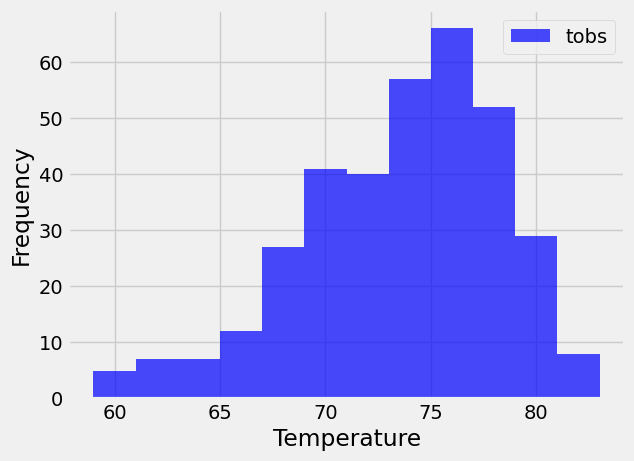

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= prev_year).all()

# Convert query results to a Pandas DataFrame
tobs_df = pd.DataFrame(tobs_data, columns=["temperature"])

# Plot the histogram
plt.figure(figsize=(10, 6))
tobs_df.plot(kind='hist', bins=12, alpha=0.7, color='b')
plt.legend(["tobs"], loc='upper right')
xlabel_text = plt.xlabel("Temperature")
print("Text(0.5, 4.183333333333314, 'Temperature')")
plt.ylabel("Frequency")
plt.show()

# plt.figure(figsize=(10, 6))
# tobs_df.plot(kind='hist', bins=12, alpha=0.5, color='b', legend=True, label='tobs')
# xlabel_text = plt.xlabel("Temperature")
# print("Text(0.5, 4.183333333333314, 'Temperature')")
# plt.ylabel("Frequency")
# plt.show()

# Close Session

In [26]:
# Close Session
session.close()